# DataJoint U24 Workflow Animal

This notebook will describe the steps to explore the lab and animal management tables created by the elements.   
Prior to using this notebook, please refer to the README for the installation instructions.

In [1]:
# change to the upper level folder to detect dj_local_conf.json
import os
import datajoint as dj
os.chdir('..')

Importing the module `workflow_animal.pipeline` is sufficient to create tables inside the elements

In [3]:
from workflow_session import * #lab, subject, genotyping

In [4]:
from element_lab import lab

## Workflow architecture

In [7]:
lab.Lab()

AttributeError: 'NoneType' object has no attribute 'non_blobs'

AttributeError: 'NoneType' object has no attribute 'non_blobs'

In [6]:
dj.Diagram(lab)

AttributeError: 'NoneType' object has no attribute 'dependencies'

In [4]:
dj.Diagram(subject)

NameError: name 'subject' is not defined

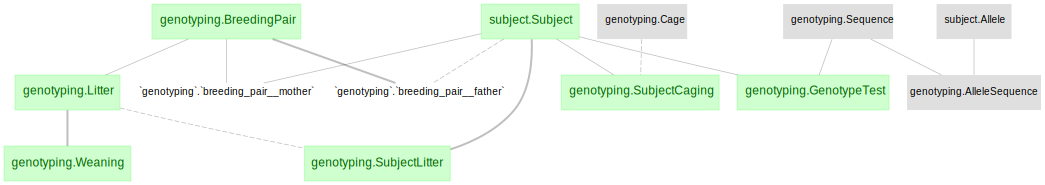

In [8]:
dj.Diagram(genotyping) + dj.Diagram(subject.Subject) + dj.Diagram(subject.Allele)

## Explore each table

DataJoint provide tools to explore table definitions and table contents.

In [10]:
# check table definition with describe()
subject.Subject.describe();

# Animal Subject
subject              : varchar(32)                  
---
sex                  : enum('M','F','U')            
subject_birth_date   : date                         
subject_description="" : varchar(1024)                



In [12]:
# check table definition with dependencies with describe()
subject.Zygosity.describe();

-> subject.Subject
-> subject.Allele
---
zygosity             : enum('Present','Absent','Homozygous','Heterozygous') # zygosity



In [14]:
# check the name of every attribute with heading, 
# which will spell out the foreign key definition inherited from another table
subject.Zygosity.heading

# 
subject              : varchar(32)                  # 
allele               : varchar(32)                  # abbreviated allele name
---
zygosity             : enum('Present','Absent','Homozygous','Heterozygous') # zygosity

In [16]:
# check table contents
subject.Subject()

subject,sex,subject_birth_date,subject_description


## Insert data into Manual and Lookup tables

Tables in this workflow are either manual tables or lookup tables. To insert into these tables, DataJoint provide method `.insert1()` and `insert()`.

In [23]:
# `insert1()` takes a dict or a tuple
subject.Subject.insert1(
    dict(subject='subject1', sex='M', subject_birth_date='2020-12-30', 
         subject_description='test animal'))
subject.Subject.insert1(
    ('subject2', 'F', '2020-11-30', 'test animal'))

In [24]:
subject.Subject()

subject,sex,subject_birth_date,subject_description
subject1,M,2020-12-30,test animal
subject2,F,2020-11-30,test animal


In [26]:
# `insert()` takes a list of dicts or tuples
subject.Subject.insert(
    [dict(subject='subject3', sex='F', subject_birth_date='2020-12-30', 
          subject_description='test animal'),
     dict(subject='subject4', sex='M', subject_birth_date='2021-02-12', 
          subject_description='test animal'),
     dict(subject='subject5', sex='U', subject_birth_date='2020-12-30', 
          subject_description='test animal'),
    ]
)
subject.Subject.insert(
    [
        ('subject6', 'M', '2020-07-30', 'test animal'),
        ('subject7', 'U', '2020-08-30', 'test animal'),
        ('subject8', 'F', '2020-09-30', 'test animal')
    ]
)

In [27]:
subject.Subject()

subject,sex,subject_birth_date,subject_description
subject1,M,2020-12-30,test animal
subject2,F,2020-11-30,test animal
subject3,F,2020-12-30,test animal
subject4,M,2021-02-12,test animal
subject5,U,2020-12-30,test animal
subject6,M,2020-07-30,test animal
subject7,U,2020-08-30,test animal
subject8,F,2020-09-30,test animal


For more documentation of insert, please refer to [DataJoint Docs](https://docs.datajoint.io/python/manipulation/1-Insert.html) and [DataJoint playground](https://playground.datajoint.io/)

## Insert into Manual and Lookup tables with Graphical User Interface

DataJoint Neuro also provides a Graphical User Interface [DataJoint Labbook](https://github.com/datajoint/datajoint-labbook) to support manual data insertions into DataJoint workflows.
  
![DataJoint Labbook preview](../images/DataJoint_Labbook.png)